In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Load the CSV file
data = pd.read_csv('../data/instagram_data.csv')

# Display the first few rows
data.head()


,likes,no_of_comments,t,follower_count_at_t,image_path
0,154552,0,1594174009,40934474,../Data/insta_data/0.jpg
1,97386,0,1593571666,40934474,../Data/insta_data/2.jpg
2,145632,0,1593136341,40934474,../Data/insta_data/4.jpg
3,76461,0,1592981047,40934474,../Data/insta_data/6.jpg
4,174620,0,1592703461,40934474,../Data/insta_data/8.jpg


In [26]:
# Calculate the 33rd and 66th percentiles
p33 = np.percentile(data['likes'], 33)
p66 = np.percentile(data['likes'], 66)

# Define the bins based on percentiles
bins = [0, p33, p66, np.inf]
labels = ['Low', 'Medium', 'High']

# Categorize the 'likes' column using these percentiles
data['likes_class'] = pd.cut(data['likes'], bins=bins, labels=labels)

# Print the chosen bin ranges
print(f"Low: 0 to {p33}")
print(f"Medium: {p33} to {p66}")
print(f"High: {p66} and above")


Low: 0 to 68295.68000000001
Medium: 68295.68000000001 to 189775.28
High: 189775.28 and above


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['likes_class_encoded'] = le.fit_transform(data['likes_class'])


In [28]:
# Features: number of comments, follower count at time t
X = data[['no_of_comments', 'follower_count_at_t']]

# Target: likes class
y = data['likes_class_encoded']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [31]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       268
           1       0.85      0.82      0.83       255
           2       0.64      0.68      0.66       234

    accuracy                           0.78       757
   macro avg       0.78      0.77      0.77       757
weighted avg       0.78      0.78      0.78       757



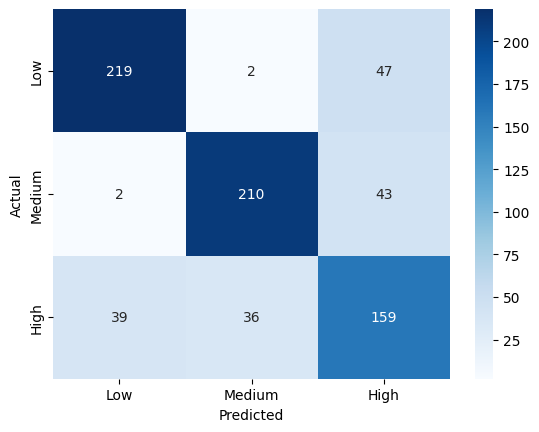

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
